<center><h1>Wavefront<h1/><center/>
    


Romario Marimon Romero <br>T00049321

En este ejercicio buscaremos el camino más corto mediante el algoritmo de wavefront 
y tomaremos como base el ejemplo explicado en clase por el profesor, utilizaremos dos tipos de vecindad.


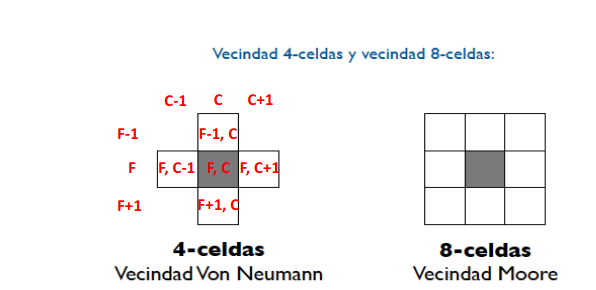




## 1. Vecindad de Von Neumann


## Pre-Análisis

1. Hay que tener en cuenta que las matrices o una lista de listas ya que estamos trabajando en python, trabajan con ciertos índices, por lo que si  dentro de la ejecución del programa se ingresa un índice erróneo , el programa se detendría debido a un error, por lo cual debemos tener en cuenta las restricciones de movimientos , es decir hacia que posiciones en las que me es lícito hacer un movimiento.Para ello utilizaremos las variables **i** y **j**  como lo mencionamos anteriormente. Por ejemplo si tenemos una matriz de mxn y nos situamos en la posición [ i , j ] = [ 0 , 0 ], podemos notar que solo nos será posible hacer movimientos hacia la derecha o hacia abajo, o si por ejemplo nos situamos en la posisción [ 3 , 4 ], entonces  solo podremos movernos hacia arriba o hacia la izquierda . 



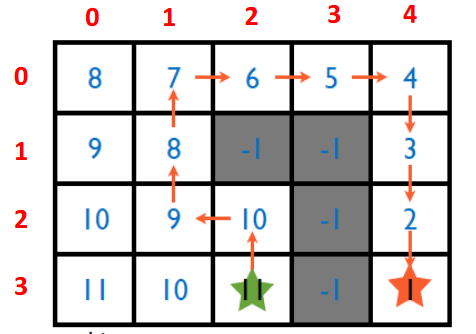


      Entonces basados en este planteamiento debemos saber cuales son todas las restricciones en la movilidad, las cuales se pueden evidenciar en la siguiente tabla : 
<br/>
<br/>

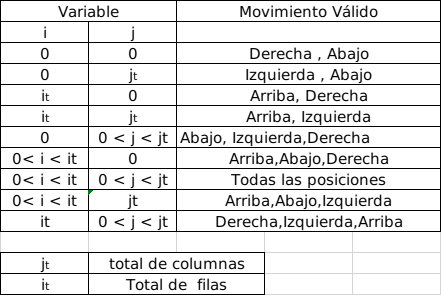

2. Ya que nuestro programa es orientado a objetos , analizaremos cuál sería la forma lógica de realizar los movimientos, para así declararlas como métodos de dicha clase y facilitar la legibilidad del algoritmo.
<br/>
<br/>




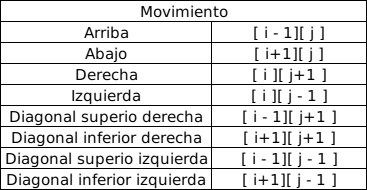
  


## Planteamiento 



Primero creamos una clase llamada Neumann, el constructor de esta posee dos atributos :
 * rows : contiene el número de filas de la “matriz” .
 * column : contiene el número de columnas de la “matriz”.
   
En el constructor se inicializa la matriz y se definen los atributos de la clase.
Los métodos de la clase son :

 * new_obstacle( ) : recibe como parámetro la posición donde se pondrá un obstáculo y lo marca 

 * route( ) :  recibe como parámetro el punto inicial y el punto objetivo(donde se quiere llegar) y los marca.  
 
 * up( ) :  recibe como parámetro la coordenada actual de un punto, y retorna un diccionario con el valor y posición de la vecindad superior.
 
 * down( ) :  recibe como parámetro la coordenada actual de un punto, y retorna un diccionario con el valor y posición de la vecindad inferior.

 * right( ) : recibe como parámetro la coordenada actual de un punto, y retorna un diccionario con el valor y posición de la vecindad derecha.

 * left( ) : recibe como parámetro la coordenada actual de un punto, y retorna un diccionario con el valor y posición de la vecindad izquierda .

 * where_move( ): recibe como parámetro la coordenada actual de un punto, y retorna una lista con los movimientos válidos para dicha posición.

 * show( ) : Imprime en pantalla la matriz.


In [1]:
import numpy as np


class Neumann:
    def __init__(self, rows, column):
        self.map = np.zeros((rows, column))
        self.total_rows = rows - 1 
        self.total_column = column - 1

    def new_obstacle(self,x_position,y_position):
        self.map[x_position,y_position] = -1

    def route(self,initial_x,initial_y,goal_x,goal_y):
        self.map[initial_x][initial_y] = -2
        self.map[goal_x][goal_y] = 1
        self.goal_x = goal_x
        self.goal_y = goal_y
        self.initial_x = initial_x
        self.initial_y = initial_y

    def up(self,i,j):
        info = {
                 'value' : self.map[i-1][j],
                 'i'     : i-1,
                 'j'     : j
               }
        return info

    def down(self,i,j):
        info = {
                 'value' : self.map[i+1][j],
                 'i'     : i+1,
                 'j'     : j
               }
        return info

    def right(self,i,j):
        info = {
                 'value' : self.map[i][j+1],
                 'i'     : i,
                 'j'     : j+1
               }
        return info  

    def left(self,i,j):
        info = {
                 'value' : self.map[i][j-1],
                 'i'     : i,
                 'j'     : j-1
               }
        return info    

    def where_move(self,i,j):
        up    = 'up'
        down  = 'down'
        right = 'right'
        left  = 'left'
        if(i == 0 and j == 0):
            move_in = []
            move_in.append(right)
            move_in.append(down)
            return move_in
        
        if(i == 0 and j == self.total_column):
            move_in = []
            move_in.append(left)
            move_in.append(down)
            return move_in
        
        if(i == self.total_rows and j == 0):
            move_in = []
            move_in.append(up)
            move_in.append(right)
            return move_in
        
        if(i == self.total_rows and j == self.total_column):
            move_in = []
            move_in.append(up)
            move_in.append(left)
            return move_in
        
        if(i == 0 and j > 0 and j < self.total_column):
            move_in = []
            move_in.append(down)
            move_in.append(left)
            move_in.append(right)
            return move_in
        
        if(i > 0 and i < self.total_rows and j == 0):
            move_in = []
            move_in.append(up)
            move_in.append(down)
            move_in.append(right)
            return move_in
        
        if(i > 0 and i < self.total_rows and j > 0 and j < self.total_column):
            move_in = []
            move_in.append(up)
            move_in.append(down)
            move_in.append(right)
            move_in.append(left)
            return move_in

        if(i > 0 and i < self.total_rows and j == self.total_column):
            move_in = []
            move_in.append(up)
            move_in.append(down)
            move_in.append(left)
            return move_in

        if(i == self.total_rows and j > 0 and j < self.total_column):
            move_in = []
            move_in.append(right)
            move_in.append(left)
            move_in.append(up)
            return move_in
    
    def show(self):
        print(self.map)


In [3]:
row = int(input('\nIngrese el numero de filas :'))
column = int(input('\nIngrese el numero de columnas :'))
robot = Neumann(row,column)
robot.show()
print()

ban = True
while(ban):
    xi = int(input('posicion X de la posicion inicial :'))
    yi = int(input('posicion Y de la posicion inicial :'))
    xf = int(input('posicion X de la posicion final(meta) :'))
    yf = int(input('posicion Y de la posicion final(meta) :'))
    if(xi > robot.total_rows or yi > robot.total_column or xf > robot.total_rows or yf > robot.total_column ):
        print('\nCoordenada incorrecta')
    else:
        robot.route(xi,yi,xf,yf)
        ban = False


n = int(input('\nIngrese el numero de obstaculos :'))
for i in range(n):
    print('\nObstaculo[',i+1,'] :','\n')
    x = int(input('posicion X del obstaculo :'))
    y = int(input('posicion Y del obstaculo :'))
    try:
        if(robot.map[x,y] is not 1):
            robot.new_obstacle(x,y)
            robot.show()
            print()
        else:
            print('\no es posible colocar un obstaculo en el punto final')    
    except:
        print('\nCoordenadas incorrectas')

print()
robot.show()
pibot = 1
i = 0
j = 0

while(True):    
        if(robot.map[i][j] == pibot):
            move_in  = robot.where_move(i,j)
            print('\ni',i,'\nj:',j)
            print(move_in,pibot)
            if 'right' in move_in:
                info = robot.right(i,j)
                if(info['value'] == -1 or info['value'] > 0):
                    pass
                else:
                    if(robot.map[ info['i'] ][ info['j'] ] == -2):
                       #robot.map[ info['i'] ][ info['j'] ] = 0
                       robot.map[ info['i'] ][ info['j']  ] = robot.map[i][j] + 1
                       print('\n-----------------------------------------','\ni:',i,'\nj:',j)
                       robot.show() 
                       break
                    else:
                        robot.map[ info['i'] ][ info['j']  ] = robot.map[i][j] + 1
                        pibot = robot.map[i][j] + 1
                        print('\n-----------------------------------------','\ni:',i,'\nj:',j)
                        robot.show()

            if 'left' in move_in:
                info = robot.left(i,j)
                if(info['value'] == -1 or info['value'] > 0):
                    pass
                else:
                    if(robot.map[ info['i'] ][ info['j'] ] == -2):
                       robot.map[ info['i'] ][ info['j'] ] = 0
                       robot.map[ info['i'] ][ info['j']  ] = robot.map[i][j] + 1
                       print('\n-----------------------------------------','\ni:',i,'\nj:',j)
                       robot.show() 
                       break
                    else:
                        robot.map[ info['i'] ][ info['j']  ] = robot.map[i][j] + 1
                        pibot = robot.map[i][j] + 1
                        print('\n-----------------------------------------','\ni:',i,'\nj:',j)
                        robot.show()

            if 'up' in move_in:
                info = robot.up(i,j)
                if(info['value'] == -1 or info['value'] > 0):
                    pass
                else:
                    if(robot.map[ info['i'] ][ info['j'] ] == -2):
                       robot.map[ info['i'] ][ info['j'] ] = 0
                       robot.map[ info['i'] ][ info['j']  ] = robot.map[i][j] + 1
                       print('\n-----------------------------------------','\ni:',i,'\nj:',j)
                       robot.show() 
                       break
                    else:
                        robot.map[ info['i'] ][ info['j']  ] = robot.map[i][j] + 1
                        pibot = robot.map[i][j] + 1
                        print('\n-----------------------------------------','\ni:',i,'\nj:',j)
                        robot.show()

            if 'down' in move_in:
                info = robot.down(i,j)
                if(info['value'] == -1 or info['value'] > 0):
                    pass
                else:
                    if(robot.map[ info['i'] ][ info['j'] ] == -2):
                       robot.map[ info['i'] ][ info['j'] ] = 0
                       robot.map[ info['i'] ][ info['j']  ] = robot.map[i][j] + 1
                       print('\n-----------------------------------------','\ni:',i,'\nj:',j)
                       robot.show() 
                       break
                    else:
                        robot.map[ info['i'] ][ info['j']  ] = robot.map[i][j] + 1
                        pibot = robot.map[i][j] + 1
                        print('\n-----------------------------------------','\ni:',i,'\nj:',j)
                        robot.show()
        
        else:
            if(i < robot.total_rows+1 or j <robot.total_column+1):
                if(j == robot.total_column):
                    if(i == robot.total_rows):
                        i = 0
                        j = 0
                    else:
                        i+=1
                        j = 0
                else:
                    j+=1

           



            
print('\n-----------------------------------------')
robot.show()


Ingrese el numero de filas :6

Ingrese el numero de columnas :6
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

posicion X de la posicion inicial :2
posicion Y de la posicion inicial :4
posicion X de la posicion final(meta) :5
posicion Y de la posicion final(meta) :1

Ingrese el numero de obstaculos :3

Obstaculo[ 1 ] : 

posicion X del obstaculo :1
posicion Y del obstaculo :1
[[ 0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -2.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]]


Obstaculo[ 2 ] : 

posicion X del obstaculo :2
posicion Y del obstaculo :3
[[ 0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0. -1. -2.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]]


Obstaculo[ 3 ] : 

posicion X del obstaculo :3
posicion Y del obstaculo :1
[[ 0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.]
 [ 0.